In [ ]:
import sys
sys.path.append("../")

from sklearn.datasets import make_classification
import torch

# Générer un jeu de données 500 exemples, 5 features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=42)

# Convertir en tenseurs PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long).reshape(-1, 1)
y=torch.eye(len(y.unique()))[y]
y=y.squeeze(1)



In [77]:
from core.MLp_layer import *
from CNN.Loop_based_cnn.Cnn_layers import *
from CNN.Loop_based_cnn.Cnn_operations import *
from utils.activations import *
from core.model_structure import Deep_learning_Model


In [78]:
MLp_model=Deep_learning_Model(
    "adam","Crossentropy"
)
MLp_model.add_layers([
    Layer(X.shape[1],100,"Xaviernormal","lakyrelu"),
    Layer(100,3,"Xaviernormal")
])


In [79]:
from utils.data_manipulation import split_data
x_train,y_train,x_test,y_test=split_data(X,y,0.7)
print(f" xtrain_shape :{x_train.shape} , x_test_shape:{x_test.shape} ytrain_shape:{y_train.shape} ytest_shape:{y_test.shape}")




 xtrain_shape :torch.Size([700, 10]) , x_test_shape:torch.Size([300, 10]) ytrain_shape:torch.Size([700, 3]) ytest_shape:torch.Size([300, 3])


In [80]:
train_losses,val_losses,accs,val_accs=MLp_model.minibatch_SGD_train(100,x_train,y_train,x_test,y_test,batch_size=32,learning_rate=0.001,accuracy=True)


1 | Train Loss: 0.3893 | Val Loss: 0.3810 | Train Acc: 32.59% | Val Acc: 34.00%
2 | Train Loss: 0.3823 | Val Loss: 0.3744 | Train Acc: 34.23% | Val Acc: 36.33%
3 | Train Loss: 0.3763 | Val Loss: 0.3679 | Train Acc: 35.86% | Val Acc: 37.67%
4 | Train Loss: 0.3688 | Val Loss: 0.3617 | Train Acc: 38.54% | Val Acc: 39.00%
5 | Train Loss: 0.3642 | Val Loss: 0.3557 | Train Acc: 40.33% | Val Acc: 40.67%
6 | Train Loss: 0.3576 | Val Loss: 0.3499 | Train Acc: 42.56% | Val Acc: 43.00%
7 | Train Loss: 0.3505 | Val Loss: 0.3443 | Train Acc: 43.75% | Val Acc: 44.00%
8 | Train Loss: 0.3477 | Val Loss: 0.3388 | Train Acc: 44.35% | Val Acc: 47.00%
9 | Train Loss: 0.3414 | Val Loss: 0.3336 | Train Acc: 46.88% | Val Acc: 49.67%
10 | Train Loss: 0.3375 | Val Loss: 0.3285 | Train Acc: 47.77% | Val Acc: 50.00%
11 | Train Loss: 0.3310 | Val Loss: 0.3237 | Train Acc: 49.85% | Val Acc: 51.00%
12 | Train Loss: 0.3265 | Val Loss: 0.3190 | Train Acc: 50.89% | Val Acc: 53.33%
13 | Train Loss: 0.3215 | Val Loss: 0

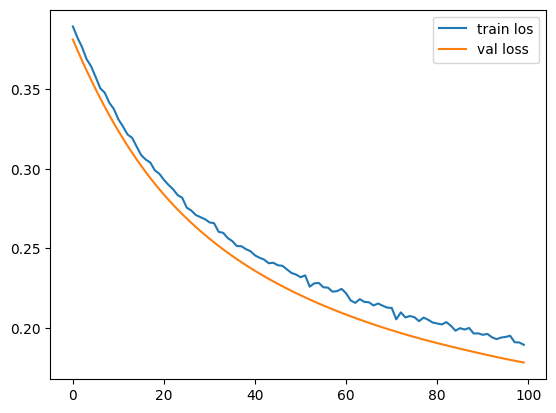

In [83]:
import matplotlib.pyplot as plt
plt.plot(range(100),train_losses,label="train los")
plt.plot(range(100),val_losses,label="val loss")
plt.legend()

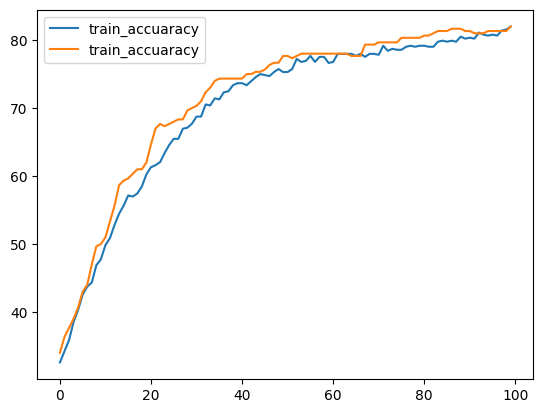

In [84]:
plt.plot(range(100),accs,label="train_accuaracy")
plt.plot(range(100),val_accs,label="train_accuaracy")
plt.legend()